# Conjunctions
In this tutorial we consider the simulation we described in [quickstart](<./quickstart.ipynb>), but instead of stopping at a collision, to then have the possibility to react and proceed, we will only track conjunctions and switch off collisions.

Let us start with some imports:

In [1]:
# core imports
import cascade as csc
import pykep as pk
import numpy as np
import heyoka as hy

# plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib inline

## The dynamics

For this tutorial we will make use the same non dimensional Keplerian dynamics used in [quickstart](<./quickstart.ipynb>).

Let us instantiate it:

In [2]:
dyn = csc.dynamics.kepler(mu = 1)


## The initial conditions

As initial conditions we also repeat the same as in [quickstart](<./quickstart.ipynb>).


In [3]:
N = 1000 # number of objects simulated
# The following numpy array will hold all the initial conditions and object radius [x,y,z,vx,vy,vz,r]
ic_state = np.zeros((N, 7))
# We generate randomly orbital parameters and imensions and transform them to Cartesian state. Note we make use of nondimensional units as defined in the dynamics.
for i in range(N):
    a = np.random.uniform(1.02, 1.3)
    e = np.random.uniform(0, 0.02)
    inc = np.random.uniform(np.pi/3, np.pi/3 + 0.05)
    om = np.random.uniform(0, 2*np.pi)
    Om = np.random.uniform(np.pi/3, np.pi/3 + 0.05)
    nu = np.random.uniform(0, 2*np.pi)
    size = np.random.uniform(1e-3/2, 1e-4)
    r, v = pk.par2ic([a, e, inc, Om, om, nu], mu = 1.)
    ic_state[i][:3] = r
    ic_state[i][3:6] = v
    ic_state[i][6] = size

... and we visualize them in proportion to a central body of radius 0.5

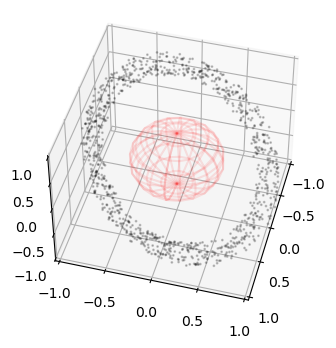

In [4]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

r = 0.5
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = r*np.cos(u)*np.sin(v)
y = r*np.sin(u)*np.sin(v)
z = r*np.cos(v)
ax.plot_wireframe(x, y, z, color="r", alpha=0.1)

ax.scatter3D(ic_state[:,0], ic_state[:,1], ic_state[:,2], alpha=0.2, s= 1, c='k')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

ax.view_init(45,15)

## Building the simulation

Since we want to track conjunctions and ignore possible collisions, we instantiate the simulation as :

In [5]:
sim = csc.sim(state = ic_state, dyn=dyn, ct = 2*np.pi / 90, conj_thresh = 1e-2, min_coll_radius=float('inf'))

Two arguments have been added with respect to the similar simulation presented in [quickstart](<./quickstart.ipynb>). The argument ``conj_thresh`` defines the conjunction threshold. All conjunction events with closest distance smaller than ``conj_thresh`` will be detected and reported. The argument ``min_coll_radius`` ignores all collisions between objects having radius smaller than its value. In this case we use infinity hence switching off all collision events.

## Running the simulation 

In [6]:
# This will try to propagate all the orbits up to the final time is reached (roughly three orbits)
oc = sim.propagate_until(6 * np.pi)

At the end of this simulation all conjunctions will be stored in the attribute {class}`cascade.sim.conjunctions`. This contains in each line the idx of the two objects, the conjunction time, the closest distance and the states of the two particles at the conjunction.

In [7]:
conj_n = len(sim.conjunctions)
conj_d = sim.conjunctions['dist']
print("Number of conjunctions: ", len(sim.conjunctions))
print("Minimal conjunction distance: ", min(conj_d))

Number of conjunctions:  473
Minimal conjunction distance:  0.00044759696356493084


## Plotting the conjunction positions

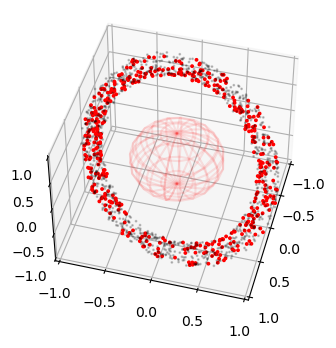

In [8]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

r = 0.5
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = r*np.cos(u)*np.sin(v)
y = r*np.sin(u)*np.sin(v)
z = r*np.cos(v)
ax.plot_wireframe(x, y, z, color="r", alpha=0.1)

ax.scatter3D(ic_state[:,0], ic_state[:,1], ic_state[:,2], alpha=0.2, s= 1, c='k')

pos = np.array([sim.conjunctions[i][4][:3] for i in range(conj_n)])
ax.scatter3D(pos[:,0], pos[:,1], pos[:,2], alpha=1, s= 3, c='r')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

ax.view_init(45,15)

as expected, in this case, conjunctions happen more or less uniformly in the Keplerian ring defined by the orbits.